In [1]:
from freepaths.scatterers import SinusWave
# from freepaths.scattering import scattering_on_sinus_wave
from matplotlib import pyplot as plt
import numpy as np

In [2]:
WIDTH       = 500e-9
HEIGHT      = 700e-9
RES         = 50

In [3]:
hole = SinusWave(x=-200e-9, y=200e-9, len=300e-9, gap=100e-9, deviation=25e-9, thickness=30e-9, tolerance=1e-12)
hole.bounds

(6.5e-08, 3.3499999999999997e-07)

(0.0, 4e-07)

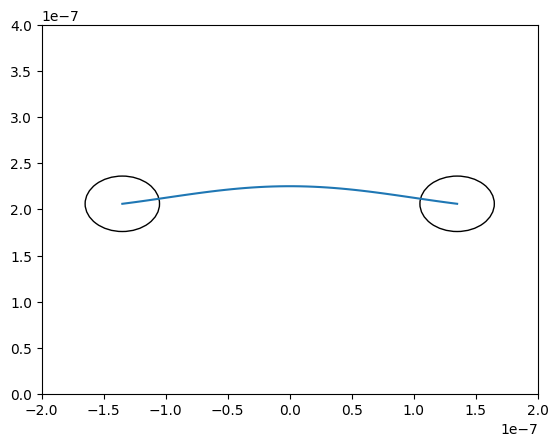

In [4]:
# plot line
xs = np.linspace(hole.bounds[0], hole.bounds[1], RES)
# xs = np.linspace(50e-9, 350e-9, RES)
zs = np.zeros(xs.shape)
for i in range(len(xs)):
    xs[i], zs[i] = hole.sin_function(xs[i])

fig, ax = plt.subplots()

ax.add_patch(plt.Circle(hole.sin_function(hole.bounds[0]),hole.thickness, fill=False))
ax.add_patch(plt.Circle(hole.sin_function(hole.bounds[1]),hole.thickness, fill=False))

plt.plot(xs, zs)

ax.set_xlim((-200e-9, 200e-9))
ax.set_ylim((0, 400e-9))


In [5]:
from math import pi, cos, sin, tan, exp, sqrt, atan, asin, acos, ceil
from random import random
from numpy import sign, array, linspace, abs, where, diff
from numpy.linalg import norm
from scipy.optimize import bisect

In [56]:
def scattering_on_sinus_wave(ph, box, sin_function, grad_function, tolerance, bounds, thickness, scattering_types, x, y, z):
    """Check if phonon strikes sinus wave and calculate new direction"""
    
    # first fast selection
    if box[0] < x and x < box[1] and box[2] < y and y < box[3]:
        # possibly inside the wave
        
        # is the point within the bounds in x direction
        leftmost_point = sin_function(bounds[0])
        rightmost_point = sin_function(bounds[1])
        if leftmost_point[0] > x:
            # check distance to leftmost point
            distance = norm(array([x, y]) - array(leftmost_point))
            closest_point = leftmost_point
        elif rightmost_point[0] < x:
            # check distance to righmost point
            distance = norm(array([x, y]) - array(rightmost_point))
            closest_point = rightmost_point
        else:
            # check distance to function
            # (tried to use scipy.minimize but results were too inaccurate)
            grad_function_2 = lambda z: grad_function(z, x, y)
            # check number of sign changes within a certain tolerance
            # (if there are multiple sign changes but they are close enough we will just choose one at random)
            eval_points = linspace(bounds[0], bounds[1], ceil((bounds[1]-bounds[0])/tolerance))
            eval_results = [grad_function_2(x) for x in eval_points]
            plt.plot(eval_points, eval_results)
            signs = sign(eval_results)
            sign_change_indices = where(diff(signs) != 0)[0]
            # return eval_points, eval_results
            print(sign_change_indices)
            distance = 100
            closest_point = (0,0)
            for sign_change in sign_change_indices:
                eval_x = eval_points[sign_change]
                point = sin_function(eval_x)
                # root = bisect(grad_function_2, eval_points[sign_change], eval_points[sign_change+1]) # maybe reduce tolreance?
                # print(root)
                # point = sin_function(root)
                if distance > norm(array([x, y]) - array(point)):
                    distance = norm(array([x, y]) - array(point))
                    closest_point = point

        if distance < thickness/2:
            # definetly inside wave

            # can use scattering on circular hole once closest point has been determined
            # scattering_on_circular_holes(ph, closest_point[0], closest_point[1], thickness/2, scattering_types, x, y, z)
            return True, distance, closest_point, eval_points, eval_results
        else:
            return False, distance, closest_point, eval_points, eval_results
        
    else:
        # definetly outside the wave
        return False, -1, closest_point, (1), (1)

# plot grid
xs, ys = np.meshgrid(np.linspace(-WIDTH/2, WIDTH/2, RES), np.linspace(0, HEIGHT, RES))
x, y = [], []
for xi, yi in zip(np.nditer(xs), np.nditer(ys)):
    bol, dist = scattering_on_sinus_wave(_, hole.box, hole.sin_function, hole.grad_function, hole.tolerance, hole.bounds, hole.thickness, _, xi, yi, 0)
    if bol:
        x.append(xi)
        y.append(yi)

plt.scatter(x, y)

[134999]
False 5.024987562602847e-08 [-5.00001852e-13  2.25000000e-07]


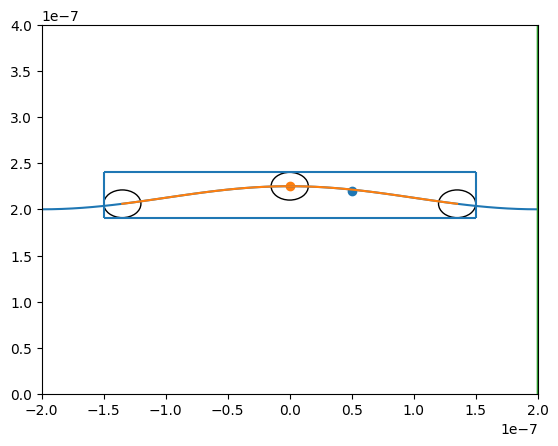

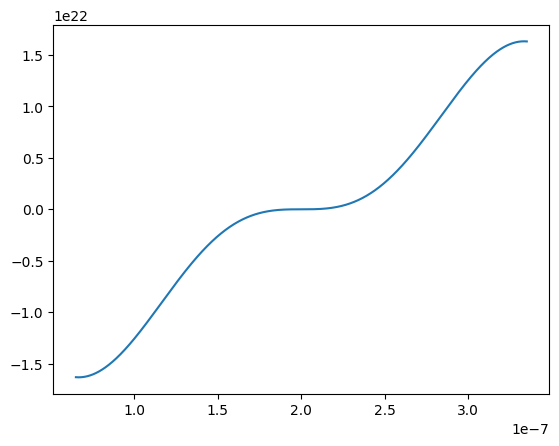

In [65]:
# plot line
# xs = np.linspace(50e-9, 350e-9, RES)
xs = np.linspace(0, 400e-9, RES)

zs = np.zeros(xs.shape)
for i in range(len(xs)):
    xs[i], zs[i] = hole.sin_function(xs[i])

fig, ax = plt.subplots()

ax.add_patch(plt.Circle(hole.sin_function(hole.bounds[0]),hole.thickness/2, fill=False))
ax.add_patch(plt.Circle(hole.sin_function(hole.bounds[1]),hole.thickness/2, fill=False))
ax.add_patch(plt.Circle(hole.sin_function(sum(hole.bounds)/2),hole.thickness/2, fill=False))


plt.plot(xs, zs)
xs = np.linspace(hole.bounds[0], hole.bounds[1], RES)

# xs = np.linspace(50e-9, 350e-9, RES)
zs = np.zeros(xs.shape)
for i in range(len(xs)):
    xs[i], zs[i] = hole.sin_function(xs[i])
plt.plot(xs, zs)

ax.set_xlim((-200e-9, 200e-9))
ax.set_ylim((0e-9, 400e-9))


POINT = (50e-9, 220e-9)

bol, dist, clos, poi, res = scattering_on_sinus_wave(_, hole.box, hole.sin_function, hole.grad_function, hole.tolerance, hole.bounds, hole.thickness, _, POINT[0], POINT[1], 0)
print(bol, dist, clos)
plt.scatter(POINT[0], POINT[1])
plt.scatter(clos[0], clos[1])

plt.hlines(hole.box[-2:], hole.box[0], hole.box[1])
plt.vlines(hole.box[:2], hole.box[2], hole.box[3])
plt.show()

plt.plot(poi, res)
plt.show()